<Figure size 1500x500 with 0 Axes>

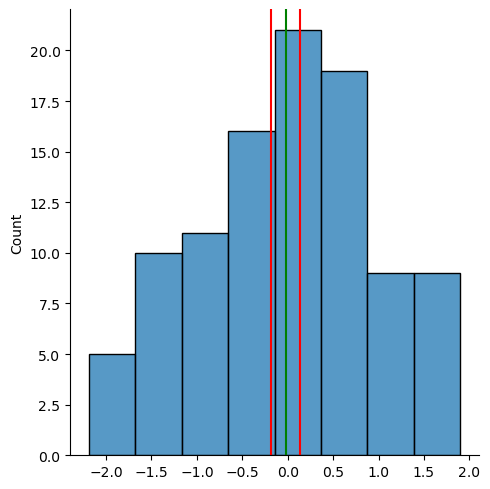

In [1]:
# confience interval

import scipy.stats as st
import numpy as np
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.normal(size=100)
sample_mean = np.mean(x)
sample_std = np.std(x)
std_err = st.sem(x)
z_value = st.norm.ppf(1 - 0.05)

lowerCi = sample_mean - (z_value * std_err)
upperCi = sample_mean + (z_value * std_err)

#plotting CI

plt.figure(figsize = (15,5))
sns.displot(x)
plt.axvline(x=lowerCi,color='red')
plt.axvline(x=upperCi,color='red')
plt.axvline(x=sample_mean,color='green')
plt.show()

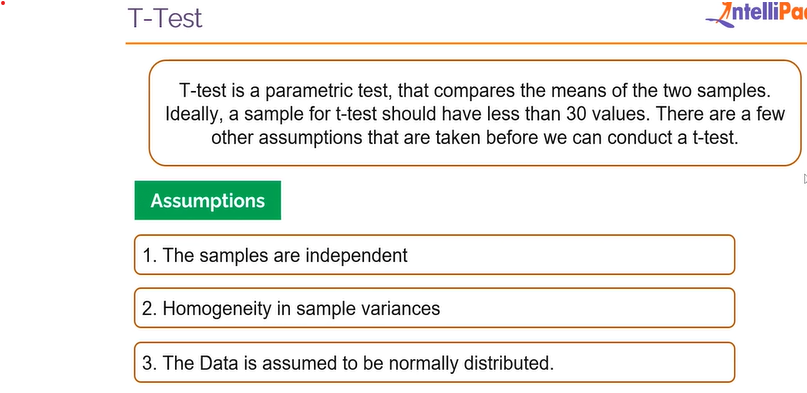

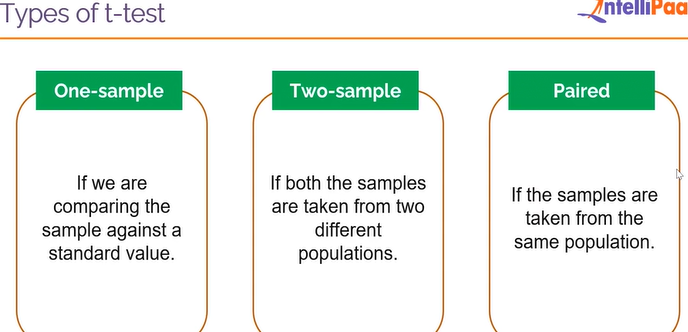

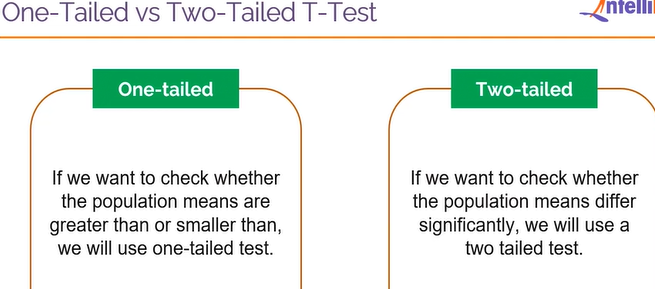

In [2]:
# one sample t-test
from scipy.stats import ttest_1samp
from random import sample

#generating a random sample to get the heights
sample = sample(range(145,180),30)
#calculating the sample mean
sample_mean = np.mean(sample)

#one sample t test parameters
print(f'{ttest_1samp(a=sample, popmean=165)}')

print('since p value is less than 0.05, reject the null hypothesis')            

TtestResult(statistic=-1.2771720485423728, pvalue=0.21167279190495714, df=29)
since p value is less than 0.05, reject the null hypothesis


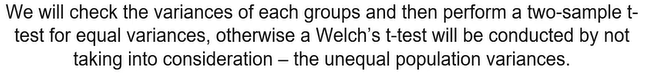

In [3]:
#two sample t-test
from random import sample
sample_1 = sample(range(140,184),30)
sample_2 = sample(range(140,184),30)

var_1 = np.var(sample_1)
var_2 = np.var(sample_2)
print(var_1,var_2)

165.78333333333333 146.98222222222222


In [4]:
from scipy.stats import ttest_ind
print(ttest_ind(sample_1,sample_2,equal_var = True))

print('fail to reject null hypothesis')

Ttest_indResult(statistic=-0.4161521489112095, pvalue=0.6788345798395372)
fail to reject null hypothesis


In [5]:
# pair t-test
from random import sample
from scipy.stats import ttest_rel

sample_female = sample(range(135,170),30)
sample_male = sample(range(145,180),30)

ttest_rel(sample_female, sample_male)

TtestResult(statistic=-3.438587529470307, pvalue=0.0017907434568123443, df=29)

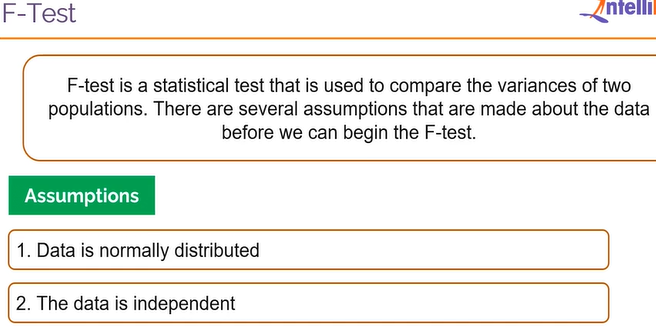

In [11]:
# f-test
from random import sample
from scipy.stats import f

sample_1 = sample(range(0,100),30)
sample_2 = sample(range(0,100),30)

f_value  = np.var(sample_1)/np.var(sample_2)
p = 1 - f.cdf(f_value, len(sample_1)-1, len(sample_2)-1)

print(f_value,p)

print("fail to reject null hypothesis")

0.9135622200791619 0.5953347954728978
fail to reject null hypothesis


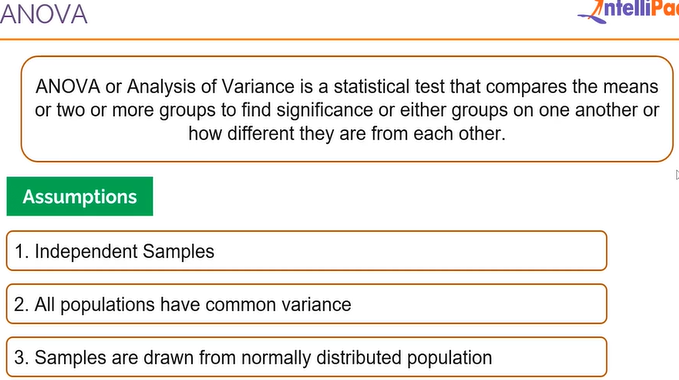

In [15]:
# one factor ANOVA used to compare more than 2 sampples

from random import sample
from scipy.stats import f_oneway

sample_1 = sample(range(0,100),20)
sample_2 = sample(range(0,95),20)
sample_3 = sample(range(0,120),20)
sample_4 = sample(range(0,145),20)

print(f_oneway(sample_1,sample_2,sample_3,sample_4))

print("fail to reject null hypothesis")

F_onewayResult(statistic=2.648707923421258, pvalue=0.054881288604128234)
fail to reject null hypothesis


In [24]:
# two factor ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

x = {
    'Lectures':np.repeat(['daily','weekly'],20),
    'tuition':np.repeat(['daily','weekly'],20),
    'Marks':sample(range(33,100),40)
}

data = pd.DataFrame(x)

#performing two way ANOVA
model = ols('Marks ~ C(Lectures) + C(tuition) + C(Lectures):C(tuition)',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(Lectures),0.412315,1.0,0.000977,0.975234
C(tuition),0.412315,1.0,0.000977,0.975234
C(Lectures):C(tuition),0.400000,1.0,0.000947,0.975606
Residual,16044.000000,38.0,NaN,NaN


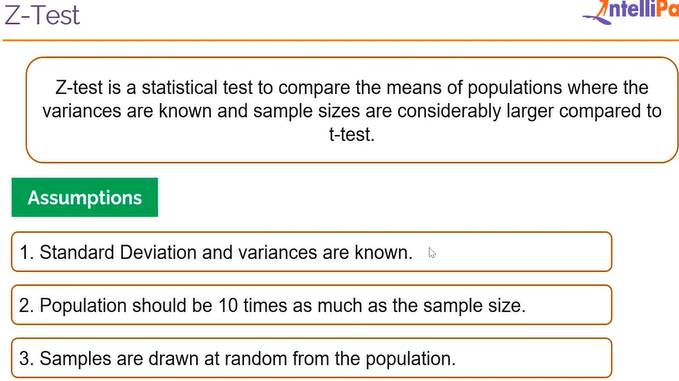

In [27]:
# one sample z test

from random import sample, choices
from statsmodels.stats.weightstats import ztest

sample = sample(range(30,80),50)
print(ztest(sample,value=55))

print("failed to reject")

(-0.24253562503633297, 0.8083651559145103)
failed to reject


In [28]:
# Two sample z test

from random import sample, choices
from statsmodels.stats.weightstats import ztest

sample_1 = sample(range(130,185),50) 
sample_2 = sample(range(130,185),50) 

print(ztest(sample_1,sample_2,value=0))

print("failed to reject")

(0.024912372949112527, 0.9801248581115832)
failed to reject


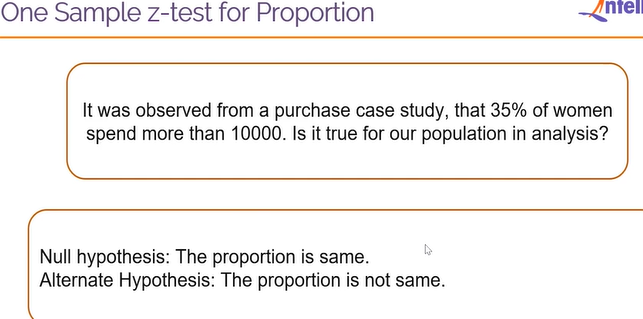

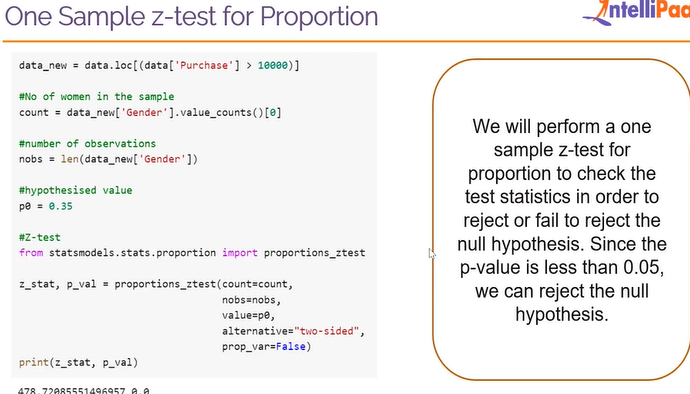

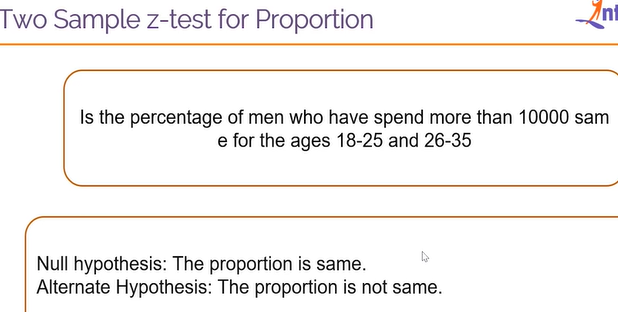

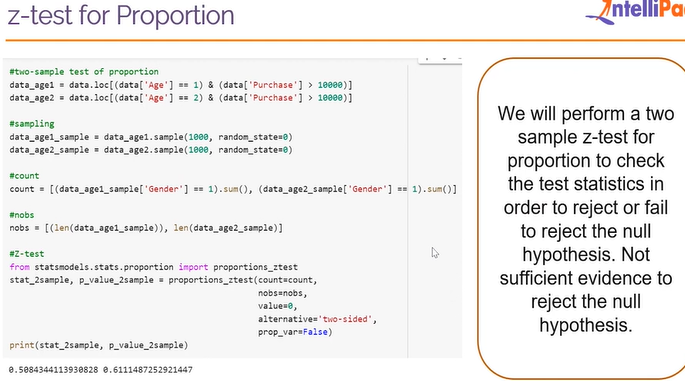

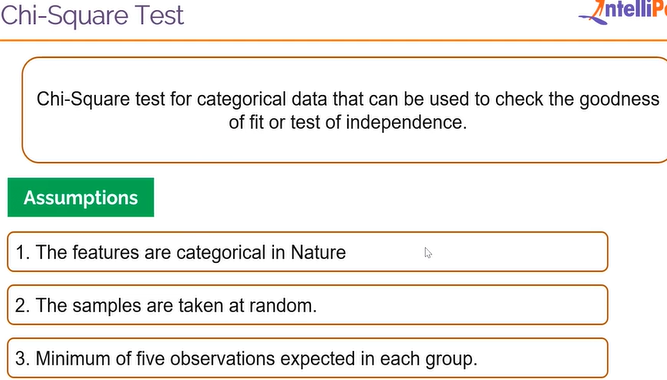

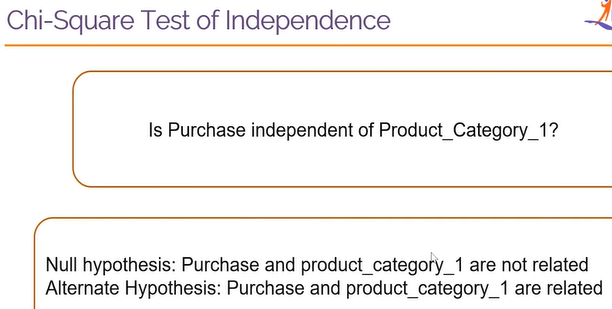

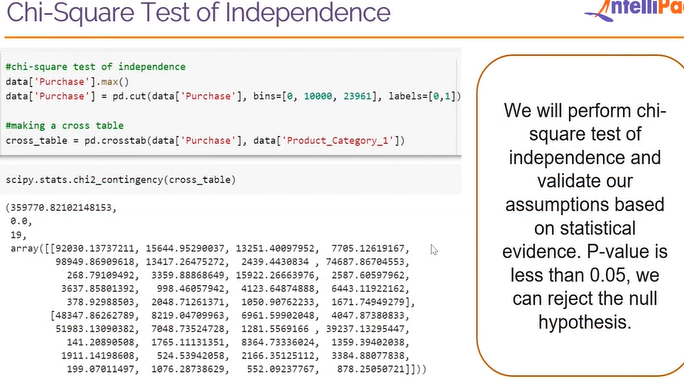